In [48]:
# Mengimpor library python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mengimpor dan menampilkan data
df = pd.read_csv("/content/drive/MyDrive/Dataset/all_weekly_excess_deaths.csv")
df

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.000000,-0.151895,-0.013278
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.000000,-0.210406,-0.018447
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.000000,-0.069594,-0.006153
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.000000,0.257038,0.022659
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.000000,0.038426,0.003435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,United States,United States,0,2022-05-09,2022-05-15,7,2022,19,336997624,57864.0,1868,55510.914407,2353.085593,55996.0,0.554307,0.698250,0.042390
5766,United States,United States,0,2022-05-16,2022-05-22,7,2022,20,336997624,57523.0,2461,54958.314407,2564.685593,55062.0,0.730272,0.761040,0.046666
5767,United States,United States,0,2022-05-23,2022-05-29,7,2022,21,336997624,56959.0,2607,54850.514407,2108.485593,54352.0,0.773596,0.625668,0.038441
5768,United States,United States,0,2022-05-30,2022-06-05,7,2022,22,336997624,57545.0,1956,54459.714407,3085.285593,55589.0,0.580420,0.915521,0.056653


In [49]:
# Mount Google Drive untuk mengakses file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Menampilkan beberapa baris pertama dari dataset
df.head()

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
0,Australia,Australia,0,2019-12-30,2020-01-05,7,2020,1,25921089,2926.0,0,2965.372893,-39.372893,2926.0,0.0,-0.151895,-0.013278
1,Australia,Australia,0,2020-01-06,2020-01-12,7,2020,2,25921089,2902.0,0,2956.539560,-54.539560,2902.0,0.0,-0.210406,-0.018447
2,Australia,Australia,0,2020-01-13,2020-01-19,7,2020,3,25921089,2914.0,0,2932.039560,-18.039560,2914.0,0.0,-0.069594,-0.006153
3,Australia,Australia,0,2020-01-20,2020-01-26,7,2020,4,25921089,3007.0,0,2940.372893,66.627107,3007.0,0.0,0.257038,0.022659
4,Australia,Australia,0,2020-01-27,2020-02-02,7,2020,5,25921089,2910.0,0,2900.039560,9.960440,2910.0,0.0,0.038426,0.003435


In [51]:
# Menghitung dan menampilkan mean, median, dan mode untuk kolom 'total_deaths'
mean_total_deaths = df["total_deaths"].mean()
median_total_deaths = df["total_deaths"].median()
mode_total_deaths = df["total_deaths"].mode()[0]

print("Mean of Total Deaths:", mean_total_deaths)
print("Median of Total Deaths:", median_total_deaths)
print("Mode of Total Deaths:", mode_total_deaths)

Mean of Total Deaths: 5697.6743847487
Median of Total Deaths: 2203.85
Mode of Total Deaths: 92.0


In [52]:
# Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan IQR untuk 'total_deaths'
q1_total_deaths = df["total_deaths"].quantile(0.25)
q3_total_deaths = df["total_deaths"].quantile(0.75)
iqr_total_deaths = q3_total_deaths - q1_total_deaths

print("Q1:", q1_total_deaths)
print("Q3:", q3_total_deaths)
print("IQR:", iqr_total_deaths)

Q1: 953.25
Q3: 6433.25
IQR: 5480.0


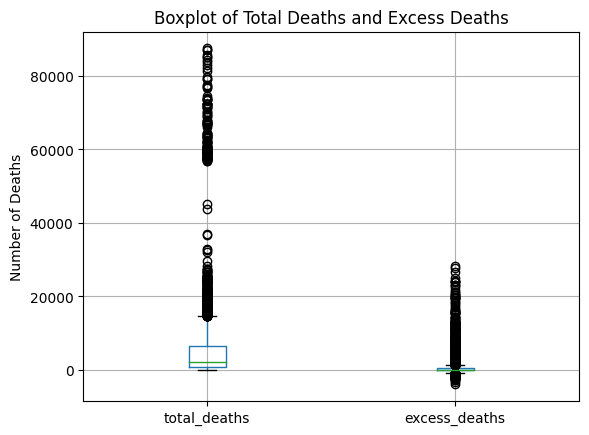

In [53]:
# Membuat boxplot untuk 'total_deaths' dan 'excess_deaths'
df.boxplot(column=["total_deaths", "excess_deaths"])
plt.title("Boxplot of Total Deaths and Excess Deaths")
plt.ylabel("Number of Deaths")
plt.show()

In [54]:
# Menghitung batas bawah dan batas atas untuk outlier pada 'total_deaths'
lower_bound_total_deaths = q1_total_deaths - 1.5 * iqr_total_deaths
upper_bound_total_deaths = q3_total_deaths + 1.5 * iqr_total_deaths

In [55]:
# Menemukan dan menampilkan outlier dalam 'total_deaths' berdasarkan batas yang dihitung
outliers_total_deaths = df[
    (df["total_deaths"] < lower_bound_total_deaths) |
    (df["total_deaths"] > upper_bound_total_deaths)
]
print("Outliers in Total Deaths:\n", outliers_total_deaths)

Outliers in Total Deaths:
             country         region  region_code  start_date    end_date  days  \
378         Britain        Britain            0  2020-01-04  2020-01-10     7   
379         Britain        Britain            0  2020-01-11  2020-01-17     7   
390         Britain        Britain            0  2020-03-28  2020-04-03     7   
391         Britain        Britain            0  2020-04-04  2020-04-10     7   
392         Britain        Britain            0  2020-04-11  2020-04-17     7   
...             ...            ...          ...         ...         ...   ...   
5765  United States  United States            0  2022-05-09  2022-05-15     7   
5766  United States  United States            0  2022-05-16  2022-05-22     7   
5767  United States  United States            0  2022-05-23  2022-05-29     7   
5768  United States  United States            0  2022-05-30  2022-06-05     7   
5769  United States  United States            0  2022-06-06  2022-06-12     7   



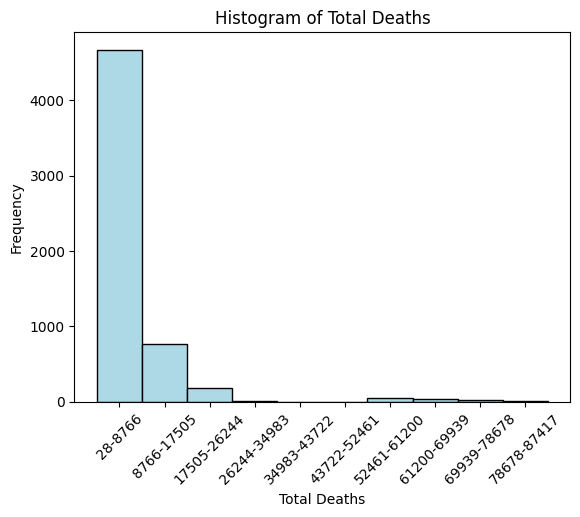

In [56]:
# Membuat histogram untuk 'total_deaths'
n, bins, patches = plt.hist(df["total_deaths"].dropna(), bins=10, color='lightblue', edgecolor='black')
plt.title('Histogram of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')

# Menampilkan rentang bin pada sumbu x
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)], rotation=45)

# Menampilkan histogram
plt.show()

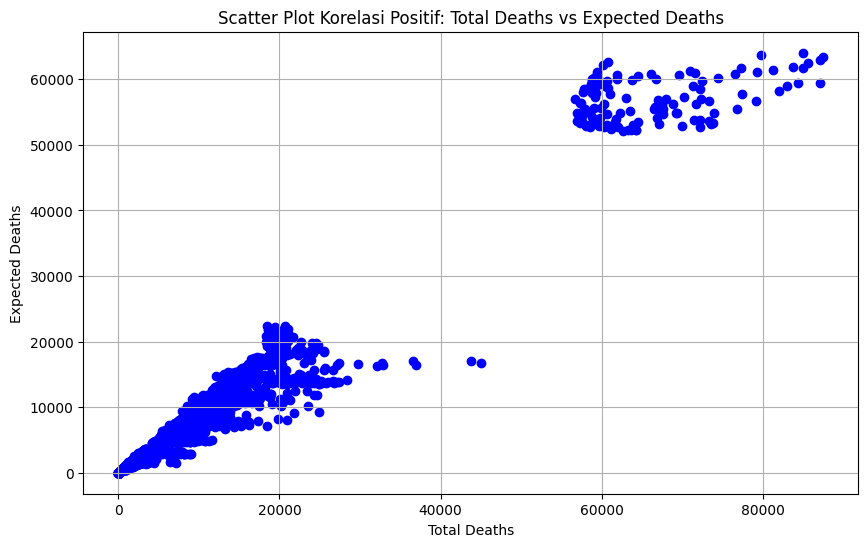

In [57]:
# Korelasi Positif: total_deaths vs expected_deaths (Contoh dengan korelasi positif)
plt.figure(figsize=(10, 6))
plt.scatter(df['total_deaths'], df['expected_deaths'], color='blue', marker='o')
plt.title('Scatter Plot Korelasi Positif: Total Deaths vs Expected Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Expected Deaths')
plt.grid(True)
plt.show()

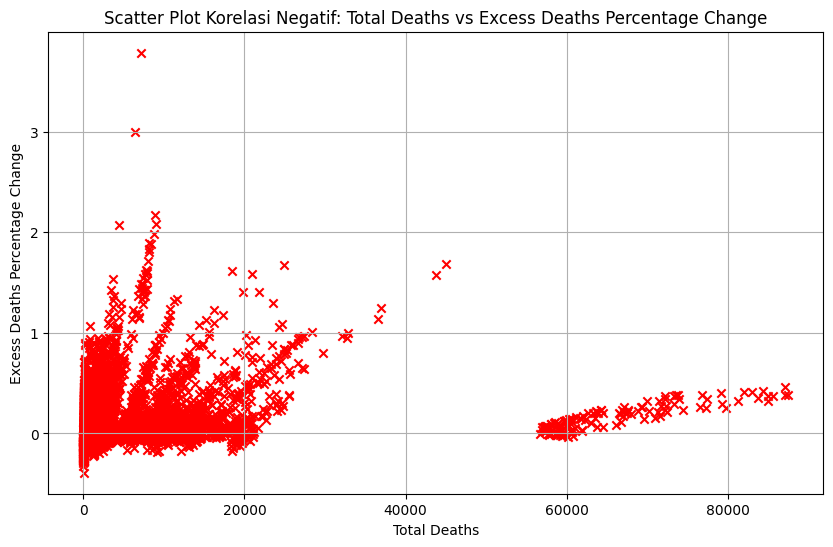

In [58]:
# Korelasi Negatif: total_deaths vs excess_deaths_pct_change (Contoh dengan korelasi negatif)
plt.figure(figsize=(10, 6))
plt.scatter(df['total_deaths'], df['excess_deaths_pct_change'], color='red', marker='x')
plt.title('Scatter Plot Korelasi Negatif: Total Deaths vs Excess Deaths Percentage Change')
plt.xlabel('Total Deaths')
plt.ylabel('Excess Deaths Percentage Change')
plt.grid(True)
plt.show()